In [39]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

#from lib import helpers

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
api_key = 'xxxx'


In [4]:
api_service_name = "youtube"
api_version = "v3"
#client_secrets_file = "YOUR_CLIENT_SECRET_FILE.json"

# Get credentials and create an API client
youtube = build(api_service_name, api_version, developerKey=api_key)


In [5]:
channel_ids= ['UC3jOd7GUMhpgJRBhiLzuLsg','UC_x5XG1OV2P6uZZ5FSM9Ttw','UCoOae5nYA7VqaXzerajD0lg']

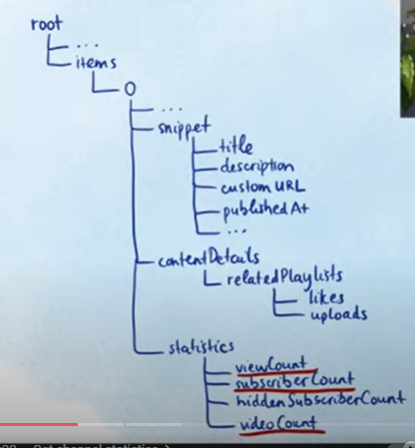

In [6]:
def get_channel_stats(youtube,channel_ids):

    all_data = []

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id= ','.join(channel_ids)
    )
    response = request.execute()

    #JSON(response)

    #loop through items
    for item in response['items']:
        data = {'channelName':item['snippet']['title'],
                'subscribers':item['statistics']['subscriberCount'],
                'views':item['statistics']['viewCount'],
                'totalVideos':item['statistics']['videoCount'],
                'playlistID':item['contentDetails']['relatedPlaylists']['uploads']
                }
        all_data.append(data)

    return(pd.DataFrame(all_data))


In [7]:
channel_stats = get_channel_stats(youtube,channel_ids)

In [8]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistID
0,Nicki Minaj,25700000,10241104564,42,UU3jOd7GUMhpgJRBhiLzuLsg
1,Ali Abdaal,4480000,336298254,661,UUoOae5nYA7VqaXzerajD0lg
2,Google for Developers,2300000,233856897,5772,UU_x5XG1OV2P6uZZ5FSM9Ttw


In [9]:
def get_channel_stats(youtube, channel_ids):
    
    """
    Get channel stats
    
    Params:
    ------
    youtube: build object of Youtube API
    channel_ids: list of channel IDs
    
    Returns:
    ------
    dataframe with all channel stats for each channel ID
    
    """
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    # loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
        
    return pd.DataFrame(all_data)

def get_video_ids(youtube, playlist_id):
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids

def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [10]:
playlist_id = "UUoOae5nYA7VqaXzerajD0lg"

In [11]:
video_ids = get_video_ids(youtube, playlist_id)

In [12]:
video_ids

['MiPtCN_fJbA',
 'hI43prriJNQ',
 'pzDSMirut2k',
 '15lyO5qmtg0',
 'alLf0hN5JsQ',
 'Jcoam1CeAq4',
 'OlQdgKmxSEI',
 'cqyHd3lR7C8',
 'jPlRjI63qKA',
 'qrzGLvLEe4w',
 'xaqO9UfHvYE',
 'waz5UpXZH3o',
 'PKwtART-z5M',
 'jb2s_FHBgt0',
 'Y4GdbD99FzE',
 'f7Lfukf0IKY',
 'Rbhhz9afUCU',
 'wNTB5C4DnNQ',
 'LeouHabV12s',
 'CUPe_TZECQQ',
 'bfk80hDfLXU',
 'dIqdSDNHT3I',
 'JzprzToSzXg',
 'bXLZ8I7s8tw',
 'Ra6mWPfgW4Q',
 'StKU4spwsss',
 'gpEzAnz5h2U',
 'ko8tl0657yI',
 'M1js7_gglOc',
 'Yf3kYUmMLgw',
 'P5S299Gy03M',
 'dx2XP_Oo6do',
 'Ze4ifhPPAQ8',
 'usflTKVErcg',
 '4mTfkDkIo4s',
 'POwUgP1rxoo',
 'E3QpXj_QOqQ',
 'LtgeCKpsgEc',
 '6o2tm00Ar8A',
 'piUicyb_F1A',
 'fBTi1zuQAIQ',
 'mUvq1vmpE70',
 'M_VLcEMPXzk',
 'k41Mq8-Axzk',
 'dSbb1NNEIu8',
 'IgT24YYn4DU',
 'o1dFc2oVkPQ',
 'xxPdTjk7beo',
 '1tosGFzwQHo',
 'Lsq6gN1_FLo',
 'oFRdwK57dYY',
 'JMh44cq60UE',
 'lpkC5h-5Pmk',
 'qWMK16uYQbU',
 'pZxdnjj4kvk',
 'hIDDk_aDflI',
 'WF8jTZNwy6w',
 'n2czIPRE0Nc',
 'sL5XWO2Z-yw',
 'apUfuncht_4',
 'dsS2wg2Y39c',
 'WoNZUlRu168',
 'HRz7yU

In [13]:
len(video_ids)

658

In [14]:
# Get video details
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,MiPtCN_fJbA,Ali Abdaal,The 4 Best Books About Money - Part 2 📚,"🎙 If you liked this, you might like my weekly ...","[Ali Abdaal, Ali abdal]",2023-07-11T12:00:15Z,13381,1884,None,5,PT50S,hd,false
1,hI43prriJNQ,Ali Abdaal,The 4 Best Books About Money - Part 1 📚,"🎙 If you liked this, you might like my weekly ...","[Ali Abdaal, Ali abdal]",2023-07-09T12:00:25Z,40256,4395,None,11,PT36S,hd,false
2,pzDSMirut2k,Ali Abdaal,How to Make Money Writing Online ✍️,"🎙 If you liked this, you might like my weekly ...","[Ali Abdaal, Ali abdal]",2023-07-07T12:00:50Z,68606,6878,None,31,PT39S,hd,false
3,15lyO5qmtg0,Ali Abdaal,How YouTube Geniuses Would Start a Channel in ...,Check out Epidemic Sound and get a free 30 day...,"[Ali Abdaal, Ali abdal, ali abdaal productivit...",2023-07-01T12:00:00Z,141895,6688,None,302,PT25M49S,hd,false
4,alLf0hN5JsQ,Ali Abdaal,Gold Medal Syndrome 🥇,"🎙 If you liked this, you might like my weekly ...","[Ali Abdaal, Ali abdal]",2023-06-29T12:00:02Z,188575,12133,None,396,PT55S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,7APfFjfnNBc,Ali Abdaal,Payphone (Maroon 5) - Katherine Macfarland & A...,"First cover of 2017! We both love this song, s...","[payphone, maroon 5, acoustic cover, cover]",2017-01-04T23:13:51Z,83474,2107,None,120,PT2M35S,hd,false
654,gBpBLTSCb4s,Ali Abdaal,6med UKCAT Crash Course - In a Nutshell,The 6med UKCAT Crash Course is the most effect...,"[6med, medical school, ukcat, medicine]",2016-05-09T18:45:18Z,15052,106,None,4,PT2M11S,hd,false
655,Va0tSdPADpA,Ali Abdaal,6med BMAT Crash Course - In a Nutshell,The 6med BMAT Crash Course is the most effecti...,"[BMAT, 6med, medicine, medical students]",2016-04-27T09:04:49Z,37341,276,None,9,PT2M18S,hd,false
656,XJHM0fEH3ss,Ali Abdaal,Rolling in the Deep (Adele) - Duranka Perera &...,Our first 'proper' video! One of our all-time ...,"[rolling in the deep, adele, cover, acoustic]",2016-04-05T09:05:29Z,54523,686,None,31,PT2M29S,hd,false


## Data Preprocessing

In [15]:
# Convert count columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [16]:
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [17]:
# convert duration to seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [18]:
video_df[['durationSecs', 'duration']] 

,durationSecs,duration
0,0 days 00:00:50,PT50S
1,0 days 00:00:36,PT36S
2,0 days 00:00:39,PT39S
3,0 days 00:25:49,PT25M49S
4,0 days 00:00:55,PT55S
...,...,...
653,0 days 00:02:35,PT2M35S
654,0 days 00:02:11,PT2M11S
655,0 days 00:02:18,PT2M18S
656,0 days 00:02:29,PT2M29S


In [19]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [20]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,MiPtCN_fJbA,Ali Abdaal,The 4 Best Books About Money - Part 2 📚,"🎙 If you liked this, you might like my weekly ...","[Ali Abdaal, Ali abdal]",2023-07-11 12:00:15+00:00,13381.0,1884.0,NaN,5.0,PT50S,hd,false,Tuesday,0 days 00:00:50,2
1,hI43prriJNQ,Ali Abdaal,The 4 Best Books About Money - Part 1 📚,"🎙 If you liked this, you might like my weekly ...","[Ali Abdaal, Ali abdal]",2023-07-09 12:00:25+00:00,40256.0,4395.0,NaN,11.0,PT36S,hd,false,Sunday,0 days 00:00:36,2
2,pzDSMirut2k,Ali Abdaal,How to Make Money Writing Online ✍️,"🎙 If you liked this, you might like my weekly ...","[Ali Abdaal, Ali abdal]",2023-07-07 12:00:50+00:00,68606.0,6878.0,NaN,31.0,PT39S,hd,false,Friday,0 days 00:00:39,2
3,15lyO5qmtg0,Ali Abdaal,How YouTube Geniuses Would Start a Channel in ...,Check out Epidemic Sound and get a free 30 day...,"[Ali Abdaal, Ali abdal, ali abdaal productivit...",2023-07-01 12:00:00+00:00,141895.0,6688.0,NaN,302.0,PT25M49S,hd,false,Saturday,0 days 00:25:49,19
4,alLf0hN5JsQ,Ali Abdaal,Gold Medal Syndrome 🥇,"🎙 If you liked this, you might like my weekly ...","[Ali Abdaal, Ali abdal]",2023-06-29 12:00:02+00:00,188575.0,12133.0,NaN,396.0,PT55S,hd,false,Thursday,0 days 00:00:55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,7APfFjfnNBc,Ali Abdaal,Payphone (Maroon 5) - Katherine Macfarland & A...,"First cover of 2017! We both love this song, s...","[payphone, maroon 5, acoustic cover, cover]",2017-01-04 23:13:51+00:00,83474.0,2107.0,NaN,120.0,PT2M35S,hd,false,Wednesday,0 days 00:02:35,4
654,gBpBLTSCb4s,Ali Abdaal,6med UKCAT Crash Course - In a Nutshell,The 6med UKCAT Crash Course is the most effect...,"[6med, medical school, ukcat, medicine]",2016-05-09 18:45:18+00:00,15052.0,106.0,NaN,4.0,PT2M11S,hd,false,Monday,0 days 00:02:11,4
655,Va0tSdPADpA,Ali Abdaal,6med BMAT Crash Course - In a Nutshell,The 6med BMAT Crash Course is the most effecti...,"[BMAT, 6med, medicine, medical students]",2016-04-27 09:04:49+00:00,37341.0,276.0,NaN,9.0,PT2M18S,hd,false,Wednesday,0 days 00:02:18,4
656,XJHM0fEH3ss,Ali Abdaal,Rolling in the Deep (Adele) - Duranka Perera &...,Our first 'proper' video! One of our all-time ...,"[rolling in the deep, adele, cover, acoustic]",2016-04-05 09:05:29+00:00,54523.0,686.0,NaN,31.0,PT2M29S,hd,false,Tuesday,0 days 00:02:29,4


In [21]:
def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with video IDs and associated top level comment in text.
    
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)  

In [27]:

# Function to get all comments for a video
def get_all_comments(youtube, video_id):
    comments = []
    page_token = None

    while True:
        # Make a request to retrieve comments
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=100,
            pageToken=page_token
        ).execute()

        # Extract comments from the response
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)

        # Check if there are more pages of comments
        if 'nextPageToken' in response:
            page_token = response['nextPageToken']
        else:
            break

    return comments

# Specify the video ID for which you want to scrape comments
#video_id = "15lyO5qmtg0"

# Scrape all comments for the video
#all_comments = get_all_comments(youtube, video_id)

# Create a dataframe with the comments
#comments_df = pd.DataFrame({'comments': all_comments})

# Print the dataframe
#comments_df


In [26]:
videoid_df = pd.DataFrame({'video_id': video_ids})
videoid_df

,video_id
0,MiPtCN_fJbA
1,hI43prriJNQ
2,pzDSMirut2k
3,15lyO5qmtg0
4,alLf0hN5JsQ
...,...
653,7APfFjfnNBc
654,gBpBLTSCb4s
655,Va0tSdPADpA
656,XJHM0fEH3ss


In [29]:
video_ids = videoid_df['video_id'] 
video_ids

0      MiPtCN_fJbA
1      hI43prriJNQ
2      pzDSMirut2k
3      15lyO5qmtg0
4      alLf0hN5JsQ
          ...     
653    7APfFjfnNBc
654    gBpBLTSCb4s
655    Va0tSdPADpA
656    XJHM0fEH3ss
657    LQ3Mu8A7gjY
Name: video_id, Length: 658, dtype: object

In [48]:
import re


# Function to clean a single comment
def clean_comment(comment):
    # Remove URLs
    comment = re.sub(r'http\S+|www\S+', '', comment)
    
    # Remove special characters and punctuations
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
    
    # Convert to lowercase
    comment = comment.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    comment = ' '.join(word for word in comment.split() if word not in stop_words)
    
    # Remove extra whitespaces
    comment = re.sub(r'\s+', ' ', comment).strip()
    
    return comment




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
from googleapiclient.errors import HttpError

video_ids = videoid_df['video_id'] # List of your 657 video IDs
comments_df = pd.DataFrame(columns=['VideoID', 'Comment'])

for video_id in video_ids[:5]:#adjust to a reasonable number
    try:
        # Scrape all comments for the video
        all_comments = get_all_comments(youtube, video_id)

        # Create a dataframe with the comments and video ID
        df = pd.DataFrame({'VideoID': video_id, 'Comment': all_comments})

        # Append the dataframe to the comments_df
        comments_df = pd.concat([comments_df, df], ignore_index=True)
    except HttpError as e:
        error_message = e.content.decode("utf-8")
        print(f"Error retrieving comments for video ID: {video_id}")
        print(f"Error message: {error_message}")


In [49]:
# Clean the comments in the dataframe
comments_df['CleanedComment'] = comments_df['Comment'].apply(clean_comment)

# Print the cleaned dataframe
comments_df


,VideoID,Comment,CleanedComment
0,MiPtCN_fJbA,I love Heights and highly recommend checking t...,love heights highly recommend checking use cod...
1,MiPtCN_fJbA,Bro&#39;s has that fast reasoning gotta be sma...,bro39s fast reasoning gotta smart comprehend
2,MiPtCN_fJbA,Thanks for this!,thanks
3,MiPtCN_fJbA,Ayurveda always prioritized gut health more th...,ayurveda always prioritized gut health anythin...
4,MiPtCN_fJbA,"Great video, Ali. Informative and actionable.",great video ali informative actionable
...,...,...,...
646,alLf0hN5JsQ,Imagine you just achieved your goal and thinki...,imagine achieved goal thinking what39s next
647,alLf0hN5JsQ,What shoud i do,shoud
648,alLf0hN5JsQ,Do it again and again and break your records a...,break records records
649,alLf0hN5JsQ,I want to read books but in uzbekistan you ad...,want read books uzbekistan advised books exist


In [52]:
from textblob import TextBlob

# Function to get the sentiment polarity of a comment
def get_sentiment(comment):
    blob = TextBlob(comment)
    sentiment = blob.sentiment.polarity
    return sentiment

# Define thresholds for sentiment polarity
positive_threshold = 0.2
negative_threshold = -0.2

# Function to categorize the sentiment
def categorize_sentiment(sentiment):
    if sentiment > positive_threshold:
        return 'Positive'
    elif sentiment < negative_threshold:
        return 'Negative'
    else:
        return 'Neutral'
# Apply sentiment analysis to the cleaned comments
comments_df['Sentiment'] = comments_df['CleanedComment'].apply(get_sentiment)
# Apply sentiment categorization to the dataframe
comments_df['SentimentCategory'] = comments_df['Sentiment'].apply(categorize_sentiment)





# Print the dataframe with sentiment analysis results
comments_df


,VideoID,Comment,CleanedComment,Sentiment,SentimentCategory
0,MiPtCN_fJbA,I love Heights and highly recommend checking t...,love heights highly recommend checking use cod...,0.330000,Positive
1,MiPtCN_fJbA,Bro&#39;s has that fast reasoning gotta be sma...,bro39s fast reasoning gotta smart comprehend,0.207143,Positive
2,MiPtCN_fJbA,Thanks for this!,thanks,0.200000,Neutral
3,MiPtCN_fJbA,Ayurveda always prioritized gut health more th...,ayurveda always prioritized gut health anythin...,0.200000,Neutral
4,MiPtCN_fJbA,"Great video, Ali. Informative and actionable.",great video ali informative actionable,0.800000,Positive
...,...,...,...,...,...
646,alLf0hN5JsQ,Imagine you just achieved your goal and thinki...,imagine achieved goal thinking what39s next,0.000000,Neutral
647,alLf0hN5JsQ,What shoud i do,shoud,0.000000,Neutral
648,alLf0hN5JsQ,Do it again and again and break your records a...,break records records,0.000000,Neutral
649,alLf0hN5JsQ,I want to read books but in uzbekistan you ad...,want read books uzbekistan advised books exist,0.000000,Neutral


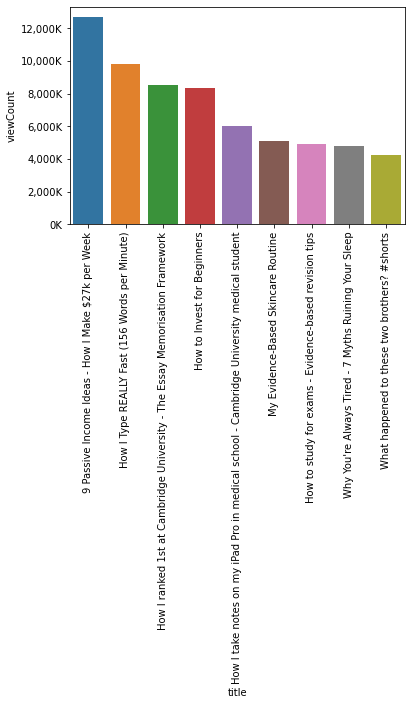

In [40]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

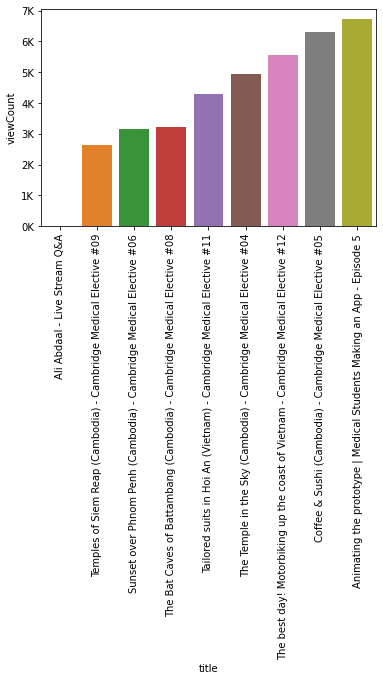

In [41]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

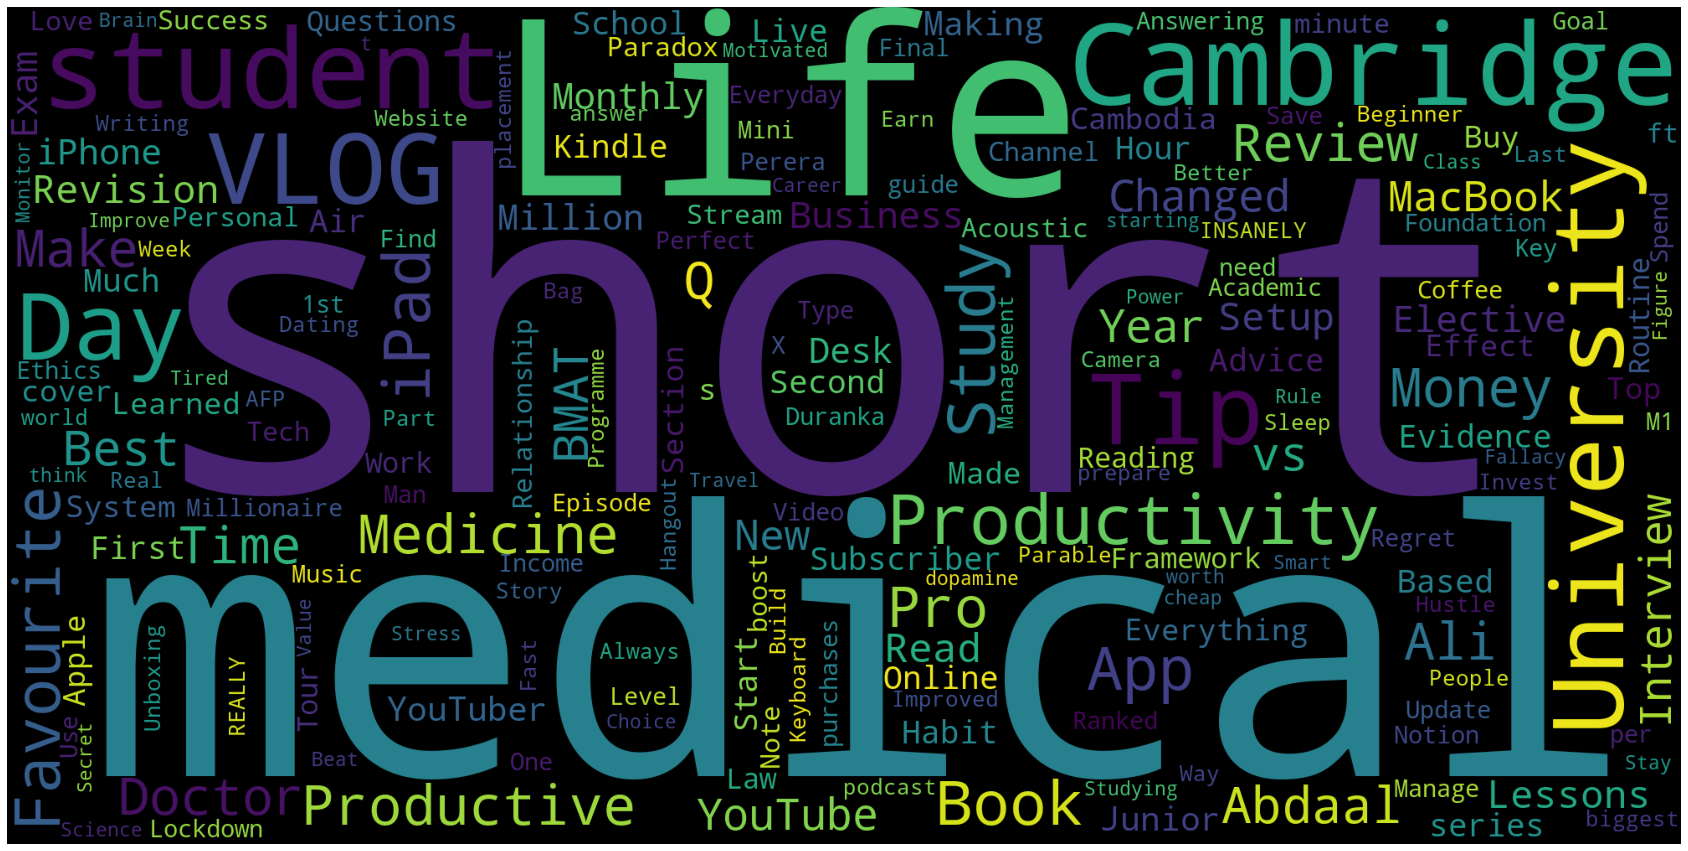

In [42]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)